### Notebook for SlideCNA - Bead Splitting
Benchmarking for this notebook:
 - Processors: 8 x AMD EPYC 7542 32-Core
 - Runtime: 05:28:26 (hh:mm:ss)
 - Memory utilized: 67.44 GB

In [1]:
# Set paths to data and result
path_to_data <- "path/to/data/"
path_to_results <- "path/to/results/"

In [2]:
libraries <- c("ggplot2", "Seurat", "glue", "dplyr", "anndata", "spacexr", 
               "data.table", "Matrix", "mltools", "enrichR", "R.utils")
lapply(libraries, function(x) suppressMessages(require(x, character.only = TRUE,quietly=TRUE,warn.conflicts = FALSE)))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

#### HTAPP-895-SMP-7359

In [3]:
sample <- "HTAPP-895-SMP-7359"

In [5]:
wd <- "/ahg/regevdata/users/dzhang/projects/HTAPP_MBC/src"
path_to_data <- paste0(wd, 
                       "/slide_CNV_official_v2/data/SlideCNA_zenodo/11-03-24/")
path_to_results <- paste0(wd, 
                          "/slide_CNV_official_v2/", 
                          sample, 
                          "/vignette_test/results/bs/")

In [5]:
setwd(paste0(wd, "/slide_CNV_official/SlideCNA_Analysis/"))

In [6]:
# Assumes you're working in the repository root directory
source(glue("code/utils.R"))

In [ ]:
#library(reticulate)
#use_condaenv(condaenv = "SlideCNA_env") #if error, set conda environment manually for reticulate

### Create beads and counts objects from bead split anndata object

In [ ]:
# otherwise skip this section and start directly with beads data.frame and counts data.frame

In [ ]:
so_adata <- anndata::read_h5ad(paste0(path_to_data, 
                                      sample,
                                      "_slide-seq_processed_bs.h5ad"))

In [ ]:
beads_df <- so_adata$obs %>% 
    `colnames<-`(c("bc", "pos_x", "pos_y", "replicate", "RCTD")) %>%
    mutate(bc = as.character(bc)) %>%
    mutate(orig_bc = bc) %>%
    group_by(orig_bc) %>%
    mutate(bc = paste0(bc, "-", c(1:n()))) %>%
    ungroup() %>%
    as.data.frame() %>%
    `rownames<-`(.[,'bc']) %>%
    mutate(cluster_type = ifelse(RCTD == "MBC", "Malignant", "Normal"))

In [ ]:
X_t <- so_adata$X %>%
    t()
counts <- cbind(as.data.frame(colnames(so_adata$X)), X_t) %>%
    `colnames<-`(c("GENE", beads_df$bc)) %>%
    `rownames<-`(.[,'GENE'])

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.3 GiB"


In [ ]:
head(beads_df)

,bc,pos_x,pos_y,replicate,RCTD,orig_bc,cluster_type
,<chr>,<dbl>,<dbl>,<fct>,<ord>,<chr>,<chr>
TCATATACTGTTGT-1-1,TCATATACTGTTGT-1-1,573.4835,1325.0195,1,MBC,TCATATACTGTTGT-1,Malignant
TACTTTCAGGACTG-1-1,TACTTTCAGGACTG-1-1,553.3513,1388.4575,1,MBC,TACTTTCAGGACTG-1,Malignant
AACCCAAGTTAGGG-1-1,AACCCAAGTTAGGG-1-1,857.6451,1081.8535,1,MBC,AACCCAAGTTAGGG-1,Malignant
ACTCAGGCCTCCAC-1-1,ACTCAGGCCTCCAC-1-1,898.0179,1044.6019,1,MBC,ACTCAGGCCTCCAC-1,Malignant
TTCGCTCCACACTT-1-1,TTCGCTCCACACTT-1-1,1220.1276,701.8704,1,MBC,TTCGCTCCACACTT-1,Malignant
TATGCGGTCGACAA-1-1,TATGCGGTCGACAA-1-1,694.5063,1551.9726,1,MBC,TATGCGGTCGACAA-1,Malignant


In [ ]:
head(counts)

,GENE,TCATATACTGTTGT-1-1,TACTTTCAGGACTG-1-1,AACCCAAGTTAGGG-1-1,ACTCAGGCCTCCAC-1-1,TTCGCTCCACACTT-1-1,TATGCGGTCGACAA-1-1,TTATCAATGACGAC-1-1,CATAAGTGCGACAA-1-1,AACGGCAAATTCAC-1-1,...,GTAATTGTCCCAAA-1-3,AAGGTGGTCTAGGG-1-2,CTAAGTGTTTCTCG-1-2,GACACATGATAGCG-1-2,CGAATTAATTTCAT-1-2,CTCCAATAGCTTAA-1-2,TGATGAAAGGACTA-1-2,CATACCGGCCATTA-1-2,GCCCGATGATGTTG-1-4,TACCCAACGCGATT-1-2
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,A1BG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,A1BG-AS1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A2M,A2M,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,A2M-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,A2ML1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1-AS1,A2ML1-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dim(beads_df)

[1] 21390     7

In [ ]:
dim(counts)

[1] 14203 21391

In [ ]:
write.table(beads_df, paste0(path_to_data, sample, "_slide-seq_bs_beads_df.txt"))
write.table(counts, paste0(path_to_data, sample, "_slide-seq_bs_counts.txt"))

### Visualize RCTD annotations of cell types after bead splitting

In [72]:
# Read inputs
beads_df <- read.table(paste0(path_to_data, sample, "_slide-seq_bs_beads_df.txt"))
counts <- read.table(paste0(path_to_data, sample, "_slide-seq_bs_counts.txt"), check.names = FALSE)
gene_pos <- read.table(paste0(path_to_data, "gene_pos.txt"))

In [73]:
# Reformat counts

In [74]:
counts_mat <- counts %>% as.data.table() %>% sparsify()
row.names(counts_mat) <- row.names(counts)

In [75]:
counts$GENE <- row.names(counts)
counts_long=reshape2::melt(counts,id.vars = "GENE")
counts_long = as.data.table(counts_long)
counts_long <- counts_long[counts_long$value!=0]

In [76]:
counts_long=merge(counts_long,beads_df,by.x="variable",by.y="bc",all.x=TRUE)
head(counts_long)

variable,GENE,value,pos_x,pos_y,replicate,RCTD,orig_bc,cluster_type
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
AAAAAAAGAATATC-1-1,ALDH18A1,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1,Malignant
AAAAAAAGAATATC-1-1,CA12,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1,Malignant
AAAAAAAGAATATC-1-1,CALR,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1,Malignant
AAAAAAAGAATATC-1-1,CLPTM1L,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1,Malignant
AAAAAAAGAATATC-1-1,COX6C,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1,Malignant
AAAAAAAGAATATC-1-1,DCTPP1,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1,Malignant


In [77]:
summary(counts_long[,sum(value),by=c("pos_x","pos_y")]$V1)
summary(counts_long[,sum(value!=0),by=c("pos_x","pos_y")]$V1)
length(unique(counts_long$variable))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   22.0   136.0   348.0   558.5   757.5  6502.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   22.0   114.2   273.0   393.3   548.8  3260.0 

[1] 21390

In [78]:
# Plot distribution of marker gene counts over space

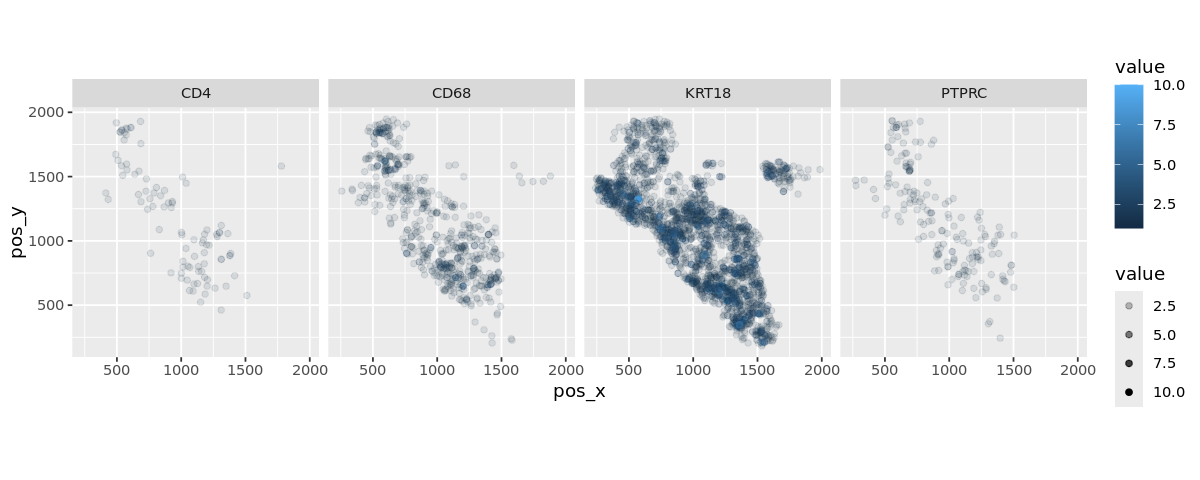

In [79]:
options(repr.plot.width = 10, repr.plot.height =4)
ggplot(counts_long[GENE%in%c("KRT18","CD4","CD68","PTPRC")],aes(x=pos_x,y=pos_y))+geom_point(aes(col=value,alpha=value))+coord_fixed()+facet_grid(~GENE)

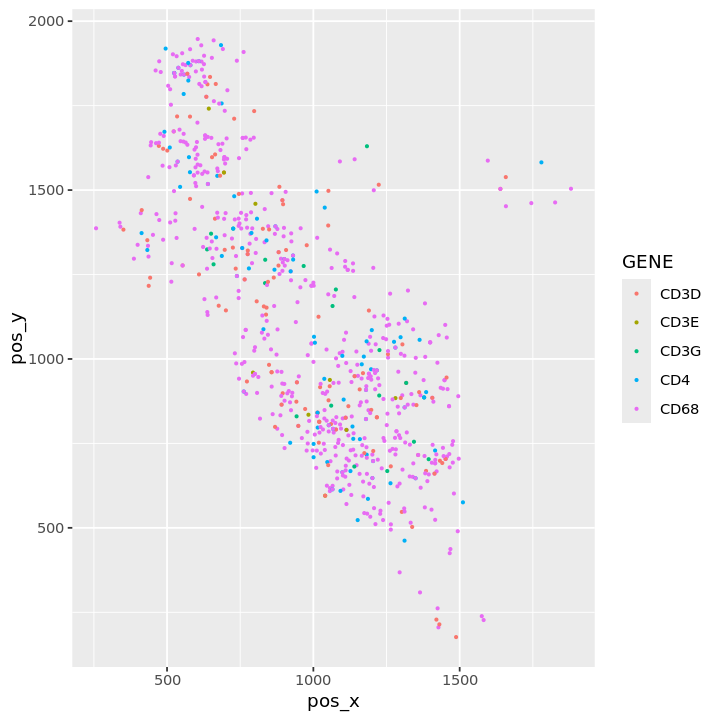

In [80]:
options(repr.plot.width = 6, repr.plot.height =6)
ggplot(counts_long[GENE%in%c("CD3E","CD3D","CD3G","CD3A","CD3B","CD4","CD68","CD56")],aes(x=pos_x,y=pos_y))+geom_point(aes(col=GENE),size=0.5)

#### Run SlideCNA

In [9]:
library(SlideCNA)

In [20]:
output_directory <- file.path(path_to_results, "SlideCNA")
plot_directory <- file.path(output_directory, "plots")
dir.create(output_directory, showWarnings = FALSE)
dir.create(plot_directory, showWarnings = FALSE)

In [ ]:
run_slide_cna(counts, 
              beads_df, 
              gene_pos,
              output_directory,
              plot_directory,
              spatial=TRUE)

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  TFF1, KRT19, COX6C, TFF3, MGP, ACTG1, AGR2, LDHA, ADIRF, RPLP0 
	   GAPDH, TUBA1B, MT-CYB, MT-ND2, CALM2, SOD1, TRPS1, MT-ATP6, PDCD4, TM4SF1 
	   DHRS2, IGFBP4, H3F3B, CRABP2, S100A14, PEBP1, ESR1, NDRG1, DSP, GSTM3 
Negative:  IGKC, IGHG3, IGLC2, HLA-DRA, APOC1, APOE, IGHM, IGLC3, IGHG1, RNASE1 
	   C1QB, HLA-DPB1, IGHG2, LYZ, GPNMB, C1QA, CTSB, IGLL5, SPP1, IGHA1 
	   HLA-DPA1, AIF1, MS4A6A, PLIN2, IGHG4, CCL18, IGLV3-1, CD14, MSR1, ACP5 
PC_ 2 
Positive:  IGHG3, IGKC, IGHG1, IGLC2, IGHG4, IGHM, IGLC3, IGLL5, IGHG2, IGHA1 
	   IGLV3-1, IGLV3-21, JSRP1, IFNG-AS1, IGHD, IGLV2-14, IGLV2-8, IGLV1-51, CD27, COL3A1 
	   IGKV4-1, KCNN3, IGHA2, TFF1, SLC38A1, CALD1, ACTA2, CCL5, COL1A2, CRISPLD1 
Negative:  APOE, CTSB, HLA-DRA, APOC1, RNASE1, C1QB, C1QA, LYZ, GPNMB, SPP1 
	   HLA-DPB1, HLA-DPA1, CCL18, AIF1, PLIN2, ACP5, MS4A6A, FCER1G, CD14, CXCL9 
	   MSR1, TREM2, FCGRT, PLXDC2, MT-ATP6, DAB2, MM

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 21390
Number of edges: 657842

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9156
Number of communities: 33
Elapsed time: 6 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
00:42:53 UMAP embedding parameters a = 0.9922 b = 1.112

00:42:53 Read 21390 rows and found 10 numeric columns

00:42:53 Using Annoy for neighbor search, n_neighbors = 30

00:42:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:42:59 Writing NN index file to temp file /local/scratch/47642484.1.interactive/RtmpKIZ3XI/filebb4570901d29

00:42:59 Searching Annoy index using 1 thread, search_k = 3000

00:43:13 Annoy recall = 99.73%

00:43:14 Commencing smooth kNN distance calibration using

#### Analyze Seurat Object of Slide-seq data

In [11]:
so <- readRDS(file=file.path(output_directory, "so.rds"))
md <- read.table(file=file.path(output_directory, "md_bin.txt"))

In [12]:
# TSNE Plots

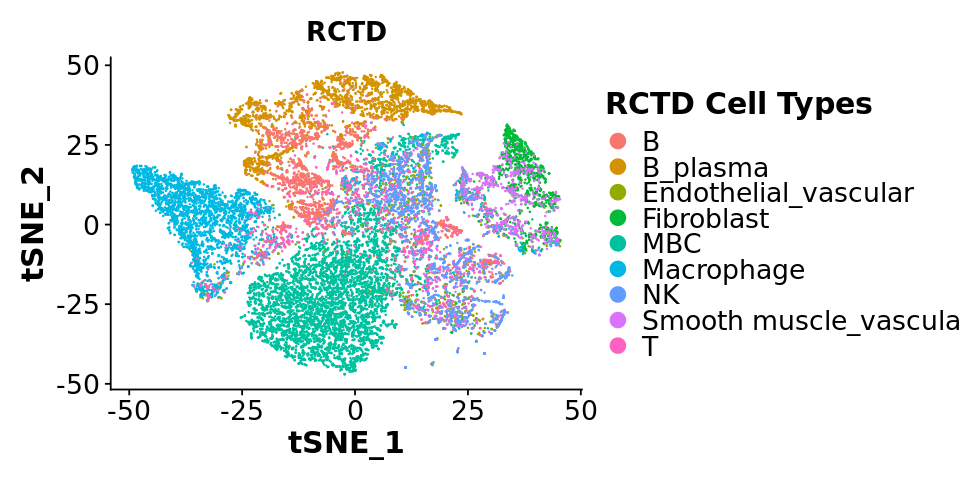

In [13]:
legend_title = "RCTD Cell Types"
options(repr.plot.width = 8, repr.plot.height = 4)
TSNEPlot(so, label.size = 18, group.by="RCTD") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

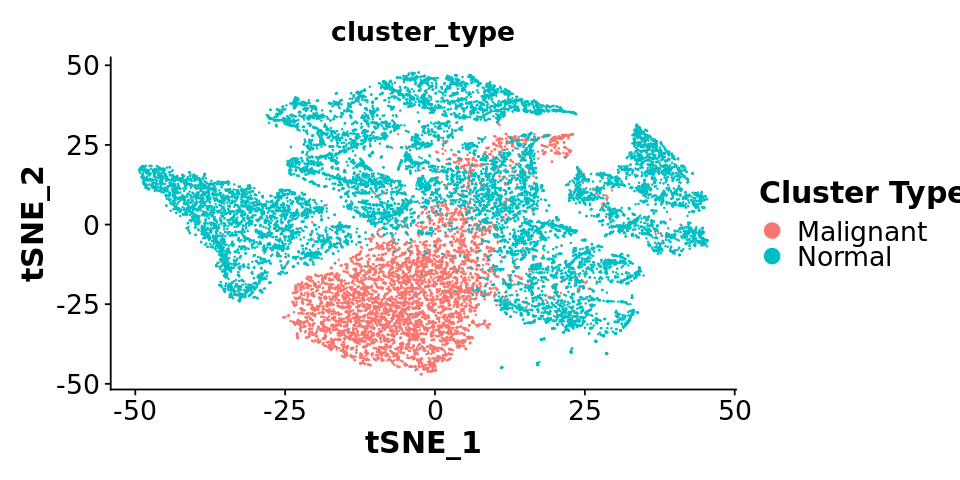

In [14]:
legend_title = "Cluster Type"
options(repr.plot.width = 8, repr.plot.height =4)
TSNEPlot(so, label.size = 18, group.by="cluster_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

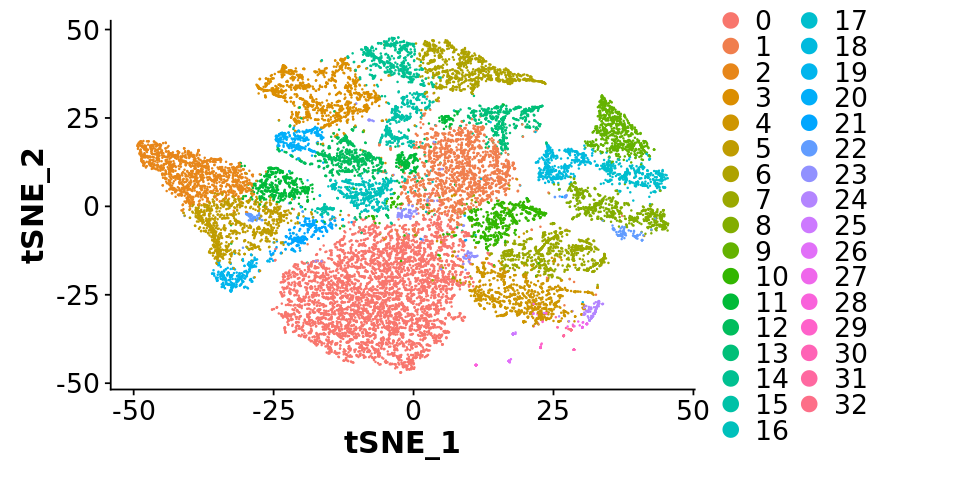

In [15]:
legend_title = "Seurat Clusters"
options(repr.plot.width = 8, repr.plot.height =4)
TSNEPlot(so, label.size = 18) +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

In [16]:
# Spatial plots

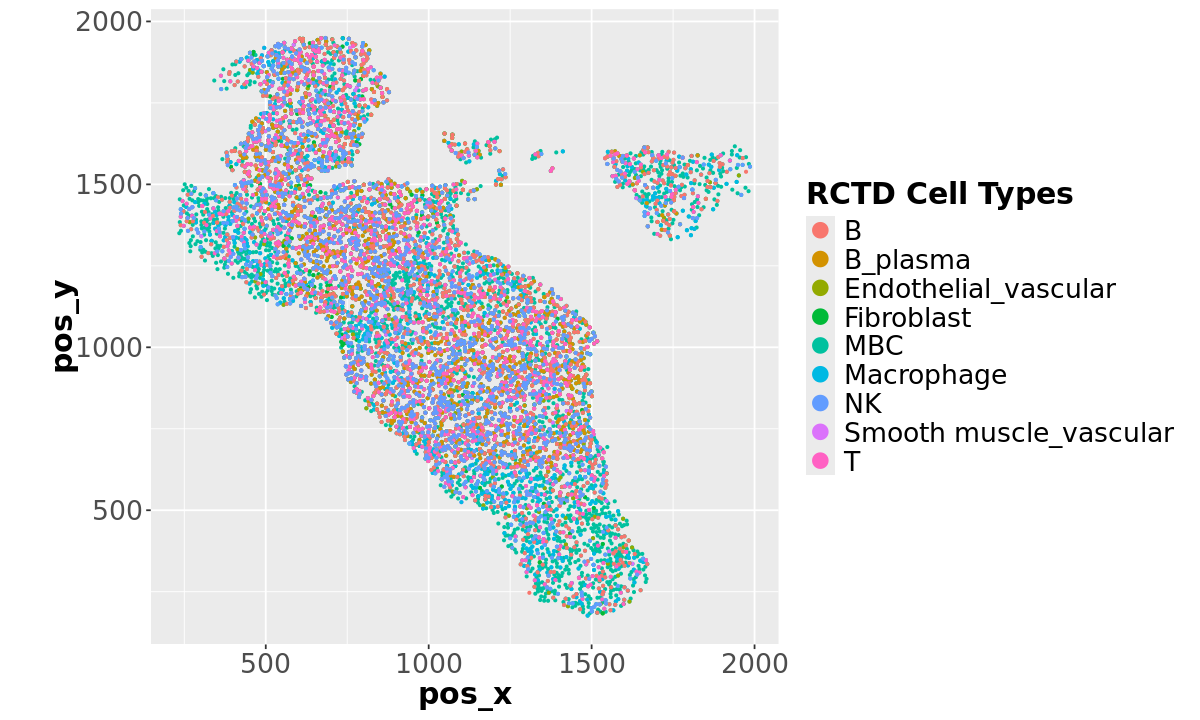

In [17]:
legend_title = "RCTD Cell Types"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=(RCTD)))+geom_point(size=0.5, position="jitter")+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

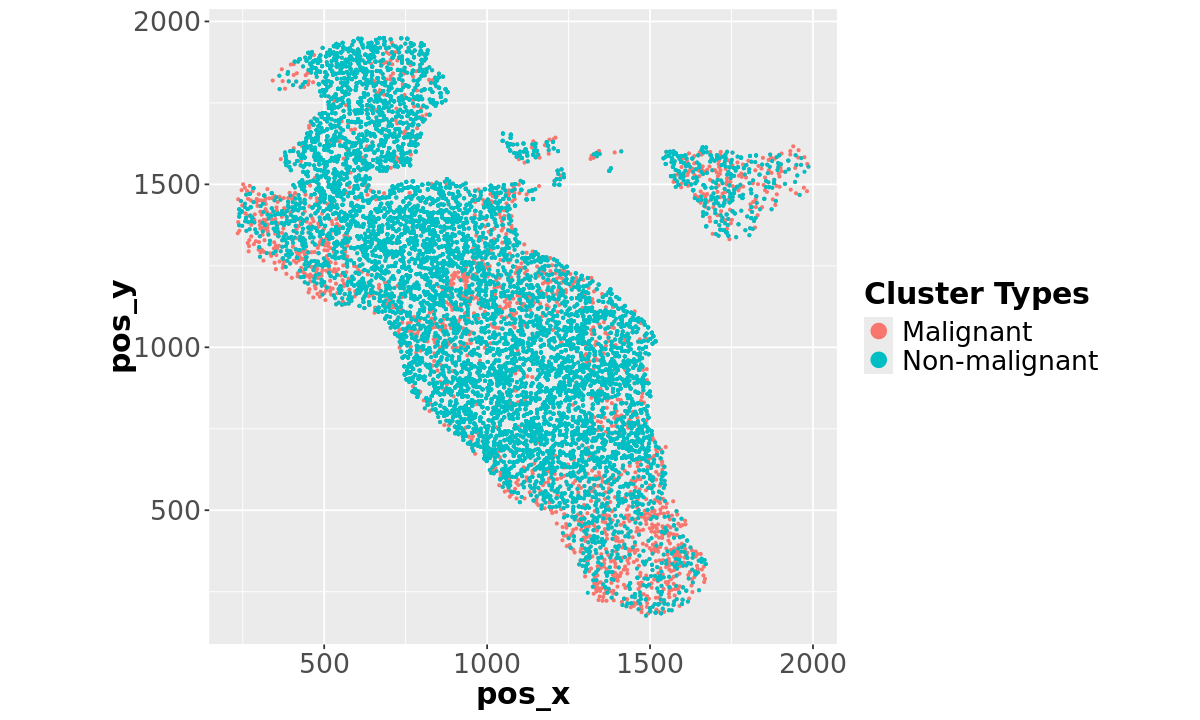

In [18]:
legend_title = "Cluster Types"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=(cluster_type)))+geom_point(size=0.5, position="jitter")+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

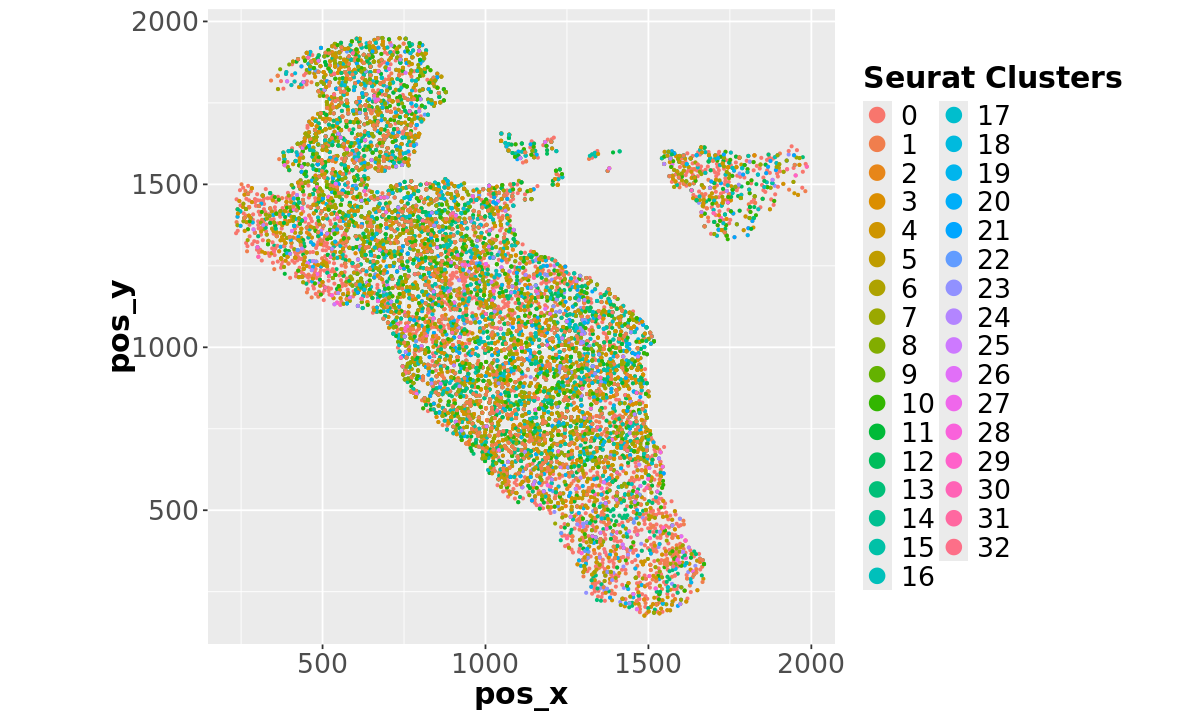

In [19]:
legend_title = "Seurat Clusters"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=as.factor(seurat_clusters)))+geom_point(size=0.5)+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))